# Spatial mapping

## Set Variables

In [1]:
workDir = '/home/bryan/RhizCG/figures/'
fullData = '/home/bryan/RhizCG/data/MiSeq_amplicon/PlotData.txt'

# Init

In [2]:
%load_ext rpy2.ipython

In [71]:
%%R
library(lsmeans)
library(lme4)
library(lmerTest)
library(ggplot2)
library(dplyr)
library(pbkrtest)
library(gridExtra)
library(multcomp)
library(lattice)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: estimability

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘lsmeans’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:lmerTest’:

    lsmeans


  res = super(Function, self).__call__(*new_args, **new_kwargs)


### Read plant master table 

In [57]:
%%R -i fullData -i workDir
setwd(workDir)
Master = read.table(fullData, header = TRUE)
Master$Rep = as.factor(Master$Rep)
colnames(Master)

 [1] "Unique"             "PlotID"             "Plant"             
 [4] "Plot"               "Treatment"          "Rep"               
 [7] "DAP"                "Sampling"           "PlantSample"       
[10] "Type"               "Grass_Broad"        "Status"            
[13] "Subfamily"          "Symbol_class"       "Plant_num"         
[16] "Leaf_AreaBiomass_g" "Biomass_T"          "Biomass_P"         
[19] "Leaf_Area_cm2"      "SLA"                "Leaf_N"            
[22] "Leaf_C"             "LeafC_N"            "LNa"               
[25] "Plant_N"            "Plant_C"            "Plant_CN"          
[28] "d15N"               "tN_p"               "BX_act"            
[31] "CB_act"             "LAP_act"            "NAG_act"           
[34] "soil_dw"            "BX_activity_g"      "CB_activity_g"     
[37] "LAP_activity_g"     "NAG_activity_g"     "BX_barefactor"     
[40] "CB_barefactor"      "LAP_barefactor"     "NAG_barefactor"    
[43] "BX_dif"             "CB_dif"             "

# Create xy coordinate variables

## X

In [59]:
%%R
Xmap = cbind(c(1,1,2,2,3,3,4,4),
            c("Npos", "Nneg", "Nneg", "Npos", "Nneg", "Npos", "Npos", "Nneg"),
            c(0, 1, 3, 4, 6, 7, 9, 10)) %>%
            as.data.frame()
            colnames(Xmap) = c("Rep", "Treatment", "Xpos")
Xmap$Xpos = as.numeric(as.character(Xmap$Xpos))*10

str(Xmap)

'data.frame':	8 obs. of  3 variables:
 $ Rep      : Factor w/ 4 levels "1","2","3","4": 1 1 2 2 3 3 4 4
 $ Treatment: Factor w/ 2 levels "Nneg","Npos": 2 1 1 2 1 2 2 1
 $ Xpos     : num  0 10 30 40 60 70 90 100


In [60]:
%%R
Master = left_join(Master, Xmap)
Master$Xpos = as.numeric(Master$Xpos)
head(Master)


             Unique    PlotID Plant Plot Treatment Rep DAP Sampling
1 sample1-1.06_Nneg 1.06_Nneg  BARE 1.06      Nneg   1  36  sample1
2 sample1-1.06_Npos 1.06_Npos  BARE 1.06      Npos   1  36  sample1
3 sample1-1.27_Nneg 1.27_Nneg FAGES 1.27      Nneg   1  36  sample1
4 sample1-1.27_Npos 1.27_Npos FAGES 1.27      Npos   1  36  sample1
5 sample1-2.05_Nneg 2.05_Nneg  BARE 2.05      Nneg   2  36  sample1
6 sample1-2.05_Npos 2.05_Npos  BARE 2.05      Npos   2  36  sample1
    PlantSample     Type Grass_Broad    Status Subfamily Symbol_class Plant_num
1  BARE_sample1     BARE   Bare_Soil Bare_Soil      <NA>            4        NA
2  BARE_sample1     BARE   Bare_Soil Bare_Soil      <NA>            4        NA
3 FAGES_sample1 Dicot-NM       Dicot      Crop      <NA>           24         4
4 FAGES_sample1 Dicot-NM       Dicot      Crop      <NA>           24         3
5  BARE_sample1     BARE   Bare_Soil Bare_Soil      <NA>            4        NA
6  BARE_sample1     BARE   Bare_Soil Bare_So

In [61]:
%%R
#as.numeric(substring(as.character(Master$Plot), 2))*1000

Master$Ypos = as.numeric(substring(as.character(Master$Plot), 2))*1000
str(Master)

'data.frame':	272 obs. of  60 variables:
 $ Unique            : Factor w/ 272 levels "sample1-1.06_Nneg",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ PlotID            : Factor w/ 216 levels "1.02_Nneg","1.02_Npos",..: 9 10 49 50 61 62 97 98 121 122 ...
 $ Plant             : Factor w/ 27 levels "75-062","ABUTH",..: 6 6 10 10 6 6 10 10 6 6 ...
 $ Plot              : num  1.06 1.06 1.27 1.27 2.05 2.05 2.23 2.23 3.07 3.07 ...
 $ Treatment         : Factor w/ 2 levels "Nneg","Npos": 1 2 1 2 1 2 1 2 1 2 ...
 $ Rep               : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 2 2 2 2 3 3 ...
 $ DAP               : int  36 36 36 36 36 36 36 36 36 36 ...
 $ Sampling          : Factor w/ 8 levels "sample1","sample2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ PlantSample       : Factor w/ 34 levels "75-062_sample5",..: 6 6 17 17 6 6 17 17 6 6 ...
 $ Type              : Factor w/ 6 levels "BARE","C4_Grass",..: 1 1 4 4 1 1 4 4 1 1 ...
 $ Grass_Broad       : Factor w/ 3 levels "Bare_Soil","Dicot",..: 1 1 2 2 1 1 2 2 1 1 ...

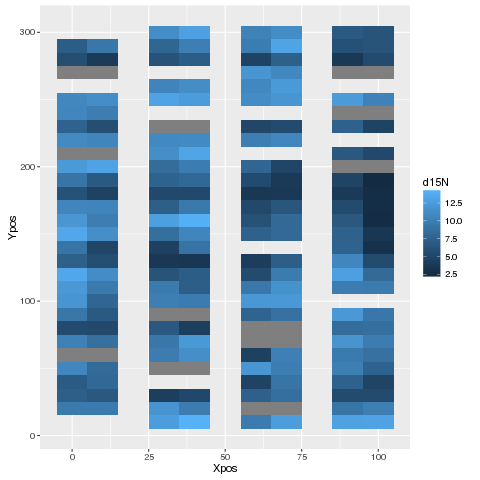

In [63]:
%%R
ggplot(Master, aes(Xpos, Ypos, fill = d15N)) + 
    geom_tile() 
   #   xlab("X Coordinate (feet)") + 
   # ylab("Y Coordinate (feet)") +
  #opts(title = "Surface elevation data") 
#   scale_fill_gradient(limits = c(7000, 10000), low = "black", high = "white") +
#   scale_x_continuous(expand = c(0,0)) +
#   scale_y_continuous(expand = c(0,0))

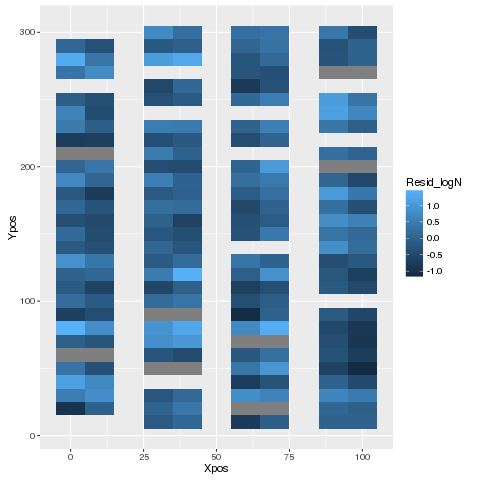

In [64]:
%%R
ggplot(Master, aes(Xpos, Ypos, fill = Resid_logN)) + 
    geom_tile() 

In [89]:
%%R
fit1 <- lm(log(Biomass_P)~ poly(DAP,2), data = Biomass)
summary(fit1) %>% print
plot(fit1) %>% print

R Help on ‘predict’predict                 package:stats                  R Documentation

_M_o_d_e_l _P_r_e_d_i_c_t_i_o_n_s

_D_e_s_c_r_i_p_t_i_o_n:

     ‘predict’ is a generic function for predictions from the results
     of various model fitting functions.  The function invokes
     particular _methods_ which depend on the ‘class’ of the first
     argument.

_U_s_a_g_e:

     predict (object, ...)
     
_A_r_g_u_m_e_n_t_s:

  object: a model object for which prediction is desired.

     ...: additional arguments affecting the predictions produced.

_D_e_t_a_i_l_s:

     Most prediction methods which are similar to those for linear
     models have an argument ‘newdata’ specifying the first place to
     look for explanatory variables to be used for prediction.  Some
     considerable attempts are made to match up the columns in
     ‘newdata’ to those used for fitting, for example that they are of
     comparable types and that any 

In [ ]:
%%R
Pred_B = predict(fit1, Master, se.fit = TRUE)
Master$Resid_logB = log(Master$Biomass_P) - Pred_B$fit


In [88]:
%%R
m = lm(Resid_logN~Plant*Treatment, data = Master, na.rm = TRUE)
anova(m)

Pred_ResidN = predict(m, Master, se.fit = TRUE, na.rm = TRUE)
Pred_ResidN
#Master$PlantResidN = Master$Resid_logN - Pred_ResidN$fit
#head(Master)


Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels) : 
  factor Plant has new levels BARE, SETIT


In [83]:
%%R
by_treat = group_by(Master, Plant)

Emeans = summarize(by_treat,
                  avg = mean(Resid_logN))
Emeans


Source: local data frame [27 x 2]

    Plant        avg
   (fctr)      (dbl)
1  75-062 -0.3241645
2   ABUTH  0.3606103
3   AMAPO  0.8768620
4     B73 -0.0310600
5     B97 -0.2526031
6    BARE         NA
7   ECHCG  0.3795634
8   ELCOR  0.4944999
9   ERATE -0.3276465
10  FAGES  0.7267567
..    ...        ...
